## 0 環境構築

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 14.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=f8ebf51e5aa5c434f73142ac28c5a44bcb54f0d770b2fc9dcba4f054449535ec
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
print(font)
sns.set(context='notebook', style='whitegrid', font=font)

['IPAexGothic']


In [ ]:
!pip install python-twitter

     |████████████████████████████████| 71kB 4.9MB/s 


In [ ]:
import json
import re
from urllib.parse import urlencode
import time
import twitter

In [ ]:
CONSUMER_KEY = "" #@param {type:"string"}
CONSUMER_SECRET = "" #@param {type:"string"}
ACCESS_TOKEN = "" #@param {type:"string"}
ACCESS_TOKEN_SECRET = "" #@param {type:"string"}

api = twitter.Api(consumer_key=CONSUMER_KEY,
                  consumer_secret=CONSUMER_SECRET,
                  access_token_key=ACCESS_TOKEN,
                  access_token_secret=ACCESS_TOKEN_SECRET)

In [ ]:
query = {
    'q': 'ヤーボイ OR オプジーボ',    # 検索ワード
    'result_type': 'recent',      # recent/popular/mixed
    'count': 100,               # 取得するツイート数 (100が最大)
}

In [ ]:
data = []
min_id = None

for i in range(150):

    try:
        if min_id is not None:
            query['max_id'] = min_id - 1

        result = api.GetSearch(raw_query=urlencode(query))
        if len(result) < 1:
            break

        min_id = min([status.id for status in result])

        for j, status in enumerate(result):

            data.append([
                status.id,
                '<br>'.join(status.text.splitlines()),
                status.favorite_count,
                status.retweet_count,
                status.created_at,
                status.lang,
                status.user.id,
#                 '<br>'.join(status.user.screen_name.splitlines()),
#                 '<br>'.join(status.user.name.splitlines()),
                status.user.followers_count,
                status.user.friends_count,
                status.user.statuses_count,
#                 '<br>'.join(status.user.description.splitlines()),
            ])

    except Exception as e:
        print(e)
        time.sleep(300)   # 300 sec
        continue

    time.sleep(3)           # 3 sec

('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


In [ ]:
df_tweet = pd.DataFrame(data)
df_tweet.columns = [
        "tweet_id",
        "text",
        "favorite",
        "retweet",
        "timestamp",
        "lang",
        "user_id",
#         "ユーザー名",
#         "ユーザー名(表示名)",
        "follower",
        "following",
        "tweets",
#         "ユーザーの事項紹介"
]
df_tweet.shape

(407, 10)

In [ ]:
df_tweet.drop(df_tweet[df_tweet['text'].str.contains('^RT', regex=True)].index, inplace=True)
df_tweet["text"] = df_tweet["text"].replace("<[^>]*>", "", regex=True)
df_tweet["text"] = df_tweet["text"].replace("https?:\/\/[0-9a-zA-Z\!\?\+\-\_\~\=\;\.\,\*\&\@\#\$\%\(\)\'\/]+", "", regex=True)
df_tweet['timestamp'] = pd.to_datetime(df_tweet['timestamp'], format='%a %b %d %H:%M:%S %z %Y')
df_tweet.set_index('timestamp', inplace=True)
df_tweet = df_tweet.tz_convert('Asia/Tokyo')
df_tweet

,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets
timestamp,,,,,,,,,
2021-05-12 21:16:01+09:00,1392453506536067072,2014年発売開始でここまで薬価が下がると開発費の回収できてるのか心配になる／オプジーボ、2...,0,0,ja,14895248,313,415,97789
2021-05-12 21:13:35+09:00,1392452897313488899,オプジーボは初めに承認されて以降劇的に適用拡大したから薬価の引き下げは仕方ないが、それにして...,0,0,ja,810558187,431,495,2275
2021-05-12 21:00:02+09:00,1392449487055032321,厚生労働省は１２日、がん治療薬「オプジーボ」の価格を８月から約１１・５％引き下げることを決め...,1,0,ja,144755016,76566,14805,61061
2021-05-12 20:45:19+09:00,1392445780913393664,オプジーボ、2万円値下げへ 当初価格の5分の1に #ニューススイート,0,0,ja,138202527,21,34,10467
2021-05-12 20:41:30+09:00,1392444820723945473,オプジーボ、2万円値下げへ 当初価格の5分の1にこれブロックバスターは日本では販売しない。っ...,10,4,ja,69193079,8290,331,138988
...,...,...,...,...,...,...,...,...,...
2021-05-05 16:18:07+09:00,1389841824815091712,2021.4.26 ③続き入院に必要な検査は前回終わってるから、入院の予約して看護士さんと面...,1,0,ja,1389504511991894016,7,6,54
2021-05-05 16:17:26+09:00,1389841651200249857,2021.4.26 ②続きオプジーボは癌細胞以外の良い細胞にも攻撃してまうみたいで怖い感じす...,1,0,ja,1389504511991894016,7,6,54
2021-05-05 16:15:52+09:00,1389841256155553797,2021.4.26 ①薬が決まった日。約3週間ぶりの病院!検査結果出るまで長かった～!検査結...,1,0,ja,1389504511991894016,7,6,54


In [ ]:
df_tweet.to_csv('medecine.csv', header=True, index=True)

In [ ]:
df_tweet = pd.read_csv('medecine.csv')
df_tweet.head()

,timestamp,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets
0,2021-05-12 21:16:01+09:00,1392453506536067072,2014年発売開始でここまで薬価が下がると開発費の回収できてるのか心配になる／オプジーボ、2...,0,0,ja,14895248,313,415,97789
1,2021-05-12 21:13:35+09:00,1392452897313488899,オプジーボは初めに承認されて以降劇的に適用拡大したから薬価の引き下げは仕方ないが、それにして...,0,0,ja,810558187,431,495,2275
2,2021-05-12 21:00:02+09:00,1392449487055032321,厚生労働省は１２日、がん治療薬「オプジーボ」の価格を８月から約１１・５％引き下げることを決め...,1,0,ja,144755016,76566,14805,61061
3,2021-05-12 20:45:19+09:00,1392445780913393664,オプジーボ、2万円値下げへ 当初価格の5分の1に #ニューススイート,0,0,ja,138202527,21,34,10467
4,2021-05-12 20:41:30+09:00,1392444820723945473,オプジーボ、2万円値下げへ 当初価格の5分の1にこれブロックバスターは日本では販売しない。っ...,10,4,ja,69193079,8290,331,138988


In [ ]:
df_tweet['timestamp'] = pd.to_datetime(df_tweet['timestamp'])
df_tweet.set_index('timestamp', inplace=True)
df_tweet = df_tweet.tz_convert('Asia/Tokyo')
df_tweet.head()

,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets
timestamp,,,,,,,,,
2021-05-12 21:16:01+09:00,1392453506536067072,2014年発売開始でここまで薬価が下がると開発費の回収できてるのか心配になる／オプジーボ、2...,0,0,ja,14895248,313,415,97789
2021-05-12 21:13:35+09:00,1392452897313488899,オプジーボは初めに承認されて以降劇的に適用拡大したから薬価の引き下げは仕方ないが、それにして...,0,0,ja,810558187,431,495,2275
2021-05-12 21:00:02+09:00,1392449487055032321,厚生労働省は１２日、がん治療薬「オプジーボ」の価格を８月から約１１・５％引き下げることを決め...,1,0,ja,144755016,76566,14805,61061
2021-05-12 20:45:19+09:00,1392445780913393664,オプジーボ、2万円値下げへ 当初価格の5分の1に #ニューススイート,0,0,ja,138202527,21,34,10467
2021-05-12 20:41:30+09:00,1392444820723945473,オプジーボ、2万円値下げへ 当初価格の5分の1にこれブロックバスターは日本では販売しない。っ...,10,4,ja,69193079,8290,331,138988


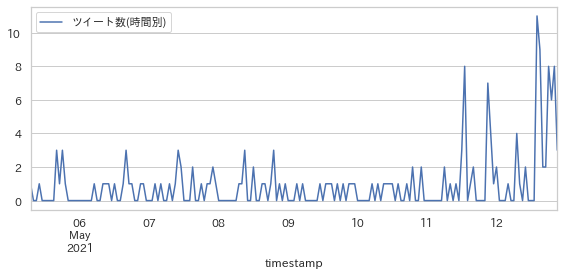

In [ ]:
df_tweet['lang'].resample('H').count().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(時間別)")
# df_tweet['lang'].resample('H').count().rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(7日移動平均)")
plt.tight_layout()

### 2.1 MeCab + neologd インストール

In [ ]:
!apt install mecab libmecab-dev file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n
!cp /etc/mecabrc /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc
!pip install fugashi ipadic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-jumandic mecab-jumandic-utf8
  mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 17.1 MB of archives.
After this operation, 227 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4

In [ ]:
import os, subprocess, ipadic
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]).decode('utf-8').strip()
ipadic.DICDIR = path_neologd
ipadic.MECAB_ARGS = '-r "{}" -d "{}"'.format(os.path.join(ipadic.DICDIR, 'mecabrc'), ipadic.DICDIR)
print(ipadic.MECAB_ARGS)

-r "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc" -d "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"


In [ ]:
from fugashi import GenericTagger
import ipadic

# m = GenericTagger(ipadic.MECAB_ARGS + " " + "-Owakati")
# m = GenericTagger(ipadic.MECAB_ARGS + " " + '--node-format="%pS%f[6]\\s" --eos-format="\\n" --unk-format="%m"')
m = GenericTagger(ipadic.MECAB_ARGS)

text = "私はフック船長が好きです。親がコロナになる。"

for word in m.parseToNodeList(text):
    print(word.surface, word.feature)

私 ('名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ')
は ('助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ')
フック船長 ('名詞', '固有名詞', '人名', '一般', '*', '*', 'フック船長', 'フックセンチョウ', 'フックセンチョー')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
好き ('名詞', '形容動詞語幹', '*', '*', '*', '*', '好き', 'スキ', 'スキ')
です ('助動詞', '*', '*', '*', '特殊・デス', '基本形', 'です', 'デス', 'デス')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')
親 ('名詞', '一般', '*', '*', '*', '*', '親', 'オヤ', 'オヤ')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
コロナ ('名詞', '一般', '*', '*', '*', '*', 'コロナ', 'コロナ', 'コロナ')
に ('助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ')
なる ('動詞', '自立', '*', '*', '五段・ラ行', '基本形', 'なる', 'ナル', 'ナル')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')


In [ ]:
m = GenericTagger(ipadic.MECAB_ARGS)

# def mecab_tokenizer(text):
#     return m.parse(text)

def mecab_tokenizer(text):
    ret = []
    for word in m.parseToNodeList(text):
        # 品詞を選択する
        if word.feature[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
            continue
        # 不要語を除去する
        if word.feature[0] == '名詞' and word.feature[1] == '非自立':  # 'よう'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '非自立':  # 'いる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '接尾':    # 'られる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '自立' and word.feature[6] in ['ある','する']:
            continue
        ret.append(word.feature[6])
    return ' '.join(ret)

In [ ]:
df_body = pd.DataFrame(df_tweet['text'])
df_body.head()

,text
timestamp,
2021-05-12 21:16:01+09:00,2014年発売開始でここまで薬価が下がると開発費の回収できてるのか心配になる／オプジーボ、2...
2021-05-12 21:13:35+09:00,オプジーボは初めに承認されて以降劇的に適用拡大したから薬価の引き下げは仕方ないが、それにして...
2021-05-12 21:00:02+09:00,厚生労働省は１２日、がん治療薬「オプジーボ」の価格を８月から約１１・５％引き下げることを決め...
2021-05-12 20:45:19+09:00,オプジーボ、2万円値下げへ 当初価格の5分の1に #ニューススイート
2021-05-12 20:41:30+09:00,オプジーボ、2万円値下げへ 当初価格の5分の1にこれブロックバスターは日本では販売しない。っ...


In [ ]:
df_body['mecab'] = df_body['text'].map(mecab_tokenizer)
df_body['length'] = df_body['mecab'].map(lambda x: x.split()).map(len)
df_body.head()

,text,mecab,length
timestamp,,,
2021-05-12 21:16:01+09:00,2014年発売開始でここまで薬価が下がると開発費の回収できてるのか心配になる／オプジーボ、2...,2014年 発売開始 ここ 薬価 下がる 開発 費 回収 できる 心配 なる opdivo ...,19
2021-05-12 21:13:35+09:00,オプジーボは初めに承認されて以降劇的に適用拡大したから薬価の引き下げは仕方ないが、それにして...,opdivo 初め 承認 以降 劇的 適用 拡大 薬価 引き下げ 仕方 5分 * ひどい 日...,19
2021-05-12 21:00:02+09:00,厚生労働省は１２日、がん治療薬「オプジーボ」の価格を８月から約１１・５％引き下げることを決め...,厚生労働省 １ ２ 日 がん 治療薬 opdivo 価格 8月 １ １ ・ ５ % 引き下げ...,35
2021-05-12 20:45:19+09:00,オプジーボ、2万円値下げへ 当初価格の5分の1に #ニューススイート,opdivo 2万円 値下げ 当初 価格 5分 * *,8
2021-05-12 20:41:30+09:00,オプジーボ、2万円値下げへ 当初価格の5分の1にこれブロックバスターは日本では販売しない。っ...,opdivo 2万円 値下げ 当初 価格 5分 * これ ブロックバスター 日本 販売 時代 来る,13


In [ ]:
print(df_body.shape)

(167, 3)


### 2.2 データの前処理

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count_vectorizer.fit_transform(df_body['mecab'].values)
feature_names = count_vectorizer.get_feature_names()
feature_names[0:10]

['0度', '10', '10年', '15度', '16度', '17度', '1年間', '1次', '200円', '2014年']

In [ ]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count_vectorizer.get_feature_names()[i])

37 	 値下げ
28 	 治療
26 	 なる
22 	 保険
21 	 適用
21 	 がん
19 	 価格
18 	 キム
18 	 リア


In [ ]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
df_count.head()

,0度,10,10年,15度,16度,17度,1年間,1次,200円,2014年,2020年度,2021年,20度,22年,23度,24度,2万円,3000万円,360m,3b,3月,3週間,40,42週間,5分,60kg,849円,8月,fda,honoka,may,mhx,nivolumab,pd,wish,yahoo,あと,いい,いう,いつも,...,酷い,長い,開発,関与,関係,関節,関連,闘病,阻害,限る,限定,限度額認定証,院生,陰謀論,障害,難い,電子版,非常,面白い,面談,音楽,音符,頑張る,頭痛,頻る,類似,飛躍,食べる,食前,食品,食品衛生,食道,飲む,騒がす,高い,高位,高額,高齢者,麻痺,黄疸
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


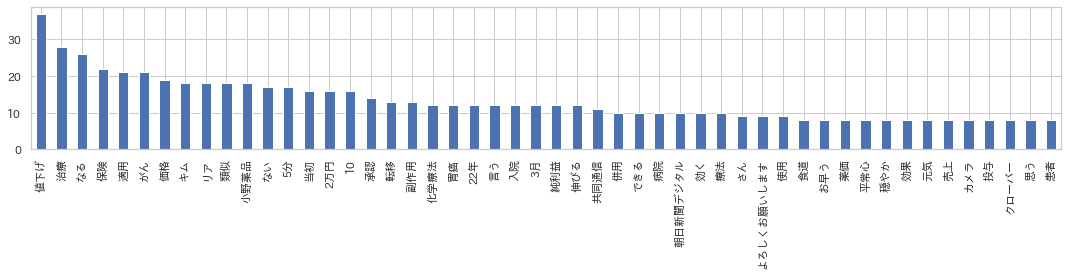

In [ ]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [ ]:
# np.set_printoptions(precision=10)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)
print('Shape:', tfidf.shape)
print('Number of non-zero entries:', tfidf.nnz)
print('Format:', tfidf.getformat())

Shape: (167, 500)
Number of non-zero entries: 1576
Format: csr


In [ ]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
df_tfidf.head()

,0度,10,10年,15度,16度,17度,1年間,1次,200円,2014年,2020年度,2021年,20度,22年,23度,24度,2万円,3000万円,360m,3b,3月,3週間,40,42週間,5分,60kg,849円,8月,fda,honoka,may,mhx,nivolumab,pd,wish,yahoo,あと,いい,いう,いつも,...,酷い,長い,開発,関与,関係,関節,関連,闘病,阻害,限る,限定,限度額認定証,院生,陰謀論,障害,難い,電子版,非常,面白い,面談,音楽,音符,頑張る,頭痛,頻る,類似,飛躍,食べる,食前,食品,食品衛生,食道,飲む,騒がす,高い,高位,高額,高齢者,麻痺,黄疸
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339745,0.0,0.0,0.0,0.0,0.0,0.0,0.222475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218611,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.30521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206579,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.361105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.474573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466330,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.259508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255001,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### PCA による重複除去

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_tfidf_std = pd.DataFrame(sc.fit_transform(df_tfidf))
df_tfidf_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-0.077615,-0.311133,-0.130575,-0.135245,-0.110087,-0.110079,-0.110096,-0.165254,-0.077615,9.298602,-0.10069,-0.134512,-0.110085,-0.274554,-0.110094,-0.110095,1.541632,-0.110096,-0.077615,-0.134054,-0.274554,-0.109828,-0.110085,-0.077615,1.522239,-0.077615,-0.077615,-0.109750,-0.108967,-0.109934,-0.109934,-0.134054,-0.162906,-0.171138,-0.077615,-0.109323,-0.120671,-0.151742,-0.122933,-0.109735,...,-0.109394,-0.097328,7.051303,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.107577,-0.077615,-0.077615,-0.077615,-0.077615,-0.147845,-0.077615,-0.077615,-0.344983,-0.077615,-0.107196,-0.077615,-0.109359,-0.077615,-0.155667,-0.109815,-0.110096,-0.150427,-0.10986,-0.165975,-0.109762,-0.077615,-0.109981
1,-0.077615,-0.311133,-0.130575,-0.135245,-0.110087,-0.110079,-0.110096,-0.165254,-0.077615,-0.110065,-0.10069,-0.134512,-0.110085,-0.274554,-0.110094,-0.110095,-0.317966,-0.110096,-0.077615,-0.134054,-0.274554,-0.109828,-0.110085,-0.077615,1.420485,-0.077615,-0.077615,-0.109750,-0.108967,-0.109934,-0.109934,-0.134054,-0.162906,-0.171138,-0.077615,-0.109323,-0.120671,-0.151742,-0.122933,-0.109735,...,-0.109394,-0.097328,-0.151515,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.107577,-0.077615,-0.077615,-0.077615,-0.077615,-0.147845,-0.077615,-0.077615,-0.344983,-0.077615,-0.107196,-0.077615,-0.109359,-0.077615,-0.155667,-0.109815,-0.110096,-0.150427,-0.10986,-0.165975,-0.109762,-0.077615,-0.109981
2,-0.077615,-0.311133,-0.130575,-0.135245,-0.110087,-0.110079,-0.110096,-0.165254,-0.077615,-0.110065,-0.10069,-0.134512,-0.110085,-0.274554,-0.110094,-0.110095,-0.317966,-0.110096,-0.077615,-0.134054,-0.274554,-0.109828,-0.110085,-0.077615,-0.326586,-0.077615,-0.077615,8.329592,-0.108967,-0.109934,-0.109934,-0.134054,-0.162906,-0.171138,-0.077615,-0.109323,-0.120671,-0.151742,-0.122933,-0.109735,...,-0.109394,-0.097328,-0.151515,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.107577,-0.077615,-0.077615,-0.077615,-0.077615,-0.147845,-0.077615,-0.077615,-0.344983,-0.077615,-0.107196,-0.077615,-0.109359,-0.077615,-0.155667,-0.109815,-0.110096,-0.150427,-0.10986,-0.165975,-0.109762,-0.077615,-0.109981
3,-0.077615,-0.311133,-0.130575,-0.135245,-0.110087,-0.110079,-0.110096,-0.165254,-0.077615,-0.110065,-0.10069,-0.134512,-0.110085,-0.274554,-0.110094,-0.110095,3.648841,-0.110096,-0.077615,-0.134054,-0.274554,-0.109828,-0.110085,-0.077615,3.617240,-0.077615,-0.077615,-0.109750,-0.108967,-0.109934,-0.109934,-0.134054,-0.162906,-0.171138,-0.077615,-0.109323,-0.120671,-0.151742,-0.122933,-0.109735,...,-0.109394,-0.097328,-0.151515,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.107577,-0.077615,-0.077615,-0.077615,-0.077615,-0.147845,-0.077615,-0.077615,-0.344983,-0.077615,-0.107196,-0.077615,-0.109359,-0.077615,-0.155667,-0.109815,-0.110096,-0.150427,-0.10986,-0.165975,-0.109762,-0.077615,-0.109981
4,-0.077615,-0.311133,-0.130575,-0.135245,-0.110087,-0.110079,-0.110096,-0.165254,-0.077615,-0.110065,-0.10069,-0.134512,-0.110085,-0.274554,-0.110094,-0.110095,1.851181,-0.110096,-0.077615,-0.134054,-0.274554,-0.109828,-0.110085,-0.077615,1.829995,-0.077615,-0.077615,-0.109750,-0.108967,-0.109934,-0.109934,-0.134054,-0.162906,-0.171138,-0.077615,-0.109323,-0.120671,-0.151742,-0.122933,-0.109735,...,-0.109394,-0.097328,-0.151515,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.0

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
tfidf_std_pca = pca.fit_transform(df_tfidf_std)
pca.explained_variance_ratio_

array([0.03906205, 0.02223348, 0.02087656, 0.01903515, 0.01750417,
       0.01721386, 0.01689441, 0.0166702 , 0.016255  , 0.01578743])

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(2)
# tfidf_std_svd = svd.fit_transform(df_tfidf_std)
# svd.explained_variance_ratio_

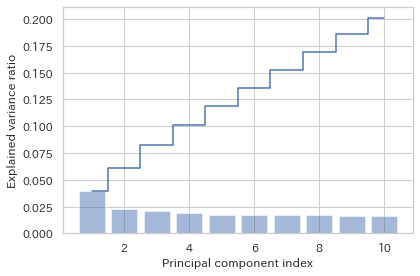

In [ ]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,11), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()

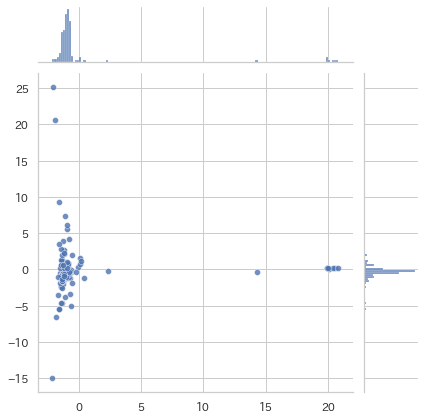

In [ ]:
sns.jointplot(x=tfidf_std_pca[:, 0], y=tfidf_std_pca[:, 1], alpha=0.8, kind='scatter')

In [ ]:
pd.DataFrame(tfidf_std_pca[:, 0]).describe()

,0
count,1.670000e+02
mean,6.382120e-16
std,4.432683e+00
min,-2.110765e+00
25%,-1.212784e+00
50%,-9.640930e-01
75%,-7.535384e-01
max,2.084679e+01


In [ ]:
for i in tfidf_std_pca[:,0].argsort()[0:10,]:
    print(i, "\t", tfidf_std_pca[i][0], "\t", df_body.iloc[i]['mecab'])

159 	 -2.1107653973248373 	 * * * 続く 話し合う 結果 今 通り 病名 言う これから 治療 初回 入院 旦那 子供 ら 伝える 三男 入院 衝撃 受け手 やっぱり 泣く 私 我慢 禁句 一緒
50 	 -2.0608047755064414 	 ニュース 切除 不能 悪性 胸膜中皮腫 一次 治療 薬 opdivo * 併用 療法 欧州医薬品庁 医薬品 委員会 承認 推奨 肯定 的 見解 示す * * 試験 生存 期間 良好 延長 達成
155 	 -1.919850582902332 	 2021年 4月21日 厚労省 薬食い 審 医薬品 二 部会 opdivo Nivolumab 切除 不能 進行 再発 悪性 胸膜中皮腫 一次 治療 * 併用 療法 可能 適応 拡大 了承 作用機序 中心 解説
136 	 -1.8072663507980484 	 退院 笑顔 喜んで 会計 * 908円 限度額認定証 有理 たまげる 泣き顔 入院 費 褐炭 じゃなくて opdivo 高位 毎回 これ かかる 治療 お金 尽きる まう 既に 尽きる 泣き顔 頑張る 決意 泣き顔 悪性黒色腫 メラノーマ opdivo
128 	 -1.6815307835465505 	 MAY * HONOKA * 末期 肺癌 余命宣告 出来る ホヤホヤ 新薬 opdivo 話 聞く 金 幾らでも 出す 俺 モルモット それ 成功 一番 宣伝 なる 言う 投薬 完 治す
148 	 -1.6354771057287316 	 初めて opdivo 50分 かかる 昼前 腕 曲げる 状態 やる 終わる 腕 痺れ 疲れ顔 今 大丈夫 副作用 怖い 何 ない いう 何 出る そう ネガティブ いつも 悩む お菓子 食べる 悩み 中 食べる 野郎
163 	 -1.6147584045775443 	 * * * 続く opdivo 癌 細胞 良い 細胞 攻撃 まう 怖い 感じ 飲む 薬 思う 点滴 2週間 ごと 点滴 初回 入院 アカン * 泊 三男 心配 入院
161 	 -1.5689488647850132 	 * 以前 知り合い opdivo 治療 受ける 比較的 早い 段階 亡くなる ずっと 心 表現 難い 思い 持つ 生存 曲線 お話 聞く 納得 できる 

In [ ]:
df_body['pca'] = tfidf_std_pca[:,0]
df_body.sort_values('pca', inplace=True)
df_body.reset_index(inplace=True)
df_body['distance'] = df_body['pca'].diff()
df_body.head()

,timestamp,text,mecab,length,pca,distance
0,2021-05-05 18:33:55+09:00,2021.5.3 ④続き話し合った結果、今まで通り病名は言わんけど、これから治療することと初...,* * * 続く 話し合う 結果 今 通り 病名 言う これから 治療 初回 入院 旦那 子...,28,-2.110765,NaN
1,2021-05-12 10:01:00+09:00,【ニュース】切除不能な悪性胸膜中皮腫の一次治療薬として、オプジーボ＋ヤーボイ併用療法を、欧州...,ニュース 切除 不能 悪性 胸膜中皮腫 一次 治療 薬 opdivo * 併用 療法 欧州医...,29,-2.060805,0.049961
2,2021-05-06 08:30:11+09:00,2021年4月21日、厚労省の薬食審医薬品第二部会にて、オプジーボ（ニボルマブ）の「切除不能...,2021年 4月21日 厚労省 薬食い 審 医薬品 二 部会 opdivo Nivoluma...,28,-1.919851,0.140954
3,2021-05-07 11:18:09+09:00,"退院～😆って喜んでたけどお会計83,908円 限度額認定証有りぶったまげた😭入院費が高かった...",退院 笑顔 喜んで 会計 * 908円 限度額認定証 有理 たまげる 泣き顔 入院 費 褐炭...,32,-1.807266,0.112584
4,2021-05-07 22:21:29+09:00,@may_history @honoka1287125 末期の肺癌で余命宣告までされていたけ...,MAY * HONOKA * 末期 肺癌 余命宣告 出来る ホヤホヤ 新薬 opdivo 話...,27,-1.681531,0.125736


In [ ]:
df_body.shape

(167, 6)

In [ ]:
df_body[df_body['distance'] == 0].head()

,timestamp,text,mecab,length,pca,distance
69,2021-05-12 16:51:28+09:00,オプジーボ、11.5％値下げ キムリア類似薬は保険適用に | 2021/5/12 - 共同通信,opdivo * * % 値下げ キム リア 類似 薬 保険 適用 * * * 共同通信,15,-0.984654,0.0
71,2021-05-12 15:21:36+09:00,オプジーボ、11.5％値下げ キムリア類似薬は保険適用に(共同通信),opdivo * * % 値下げ キム リア 類似 薬 保険 適用 共同通信,12,-0.984654,0.0
72,2021-05-12 14:43:27+09:00,オプジーボ、11.5％値下げ キムリア類似薬は保険適用に | 2021/5/12 - 共同通信,opdivo * * % 値下げ キム リア 類似 薬 保険 適用 * * * 共同通信,15,-0.984654,0.0
73,2021-05-12 15:11:15+09:00,オプジーボ、11.5％値下げ キムリア類似薬は保険適用に | 2021/5/12 - 共同通信,opdivo * * % 値下げ キム リア 類似 薬 保険 適用 * * * 共同通信,15,-0.984654,0.0
74,2021-05-12 14:52:22+09:00,オプジーボ、11.5％値下げ キムリア類似薬は保険適用に | 2021/5/12 - 共同通信,opdivo * * % 値下げ キム リア 類似 薬 保険 適用 * * * 共同通信,15,-0.984654,0.0


In [ ]:
df_body[df_body['distance'] == 0].to_csv('duplicated.txt', sep="\t")

In [ ]:
!tar zcvf duplicated.txt.tgz duplicated.txt

duplicated.txt


In [ ]:
# from google.colab import files
# files.download('duplicated.txt.tgz')

In [ ]:
df_body.drop(df_body.loc[df_body['distance'] == 0].index, inplace=True)
df_body.sort_values('timestamp', inplace=True)
df_body.set_index('timestamp', inplace=True)
df_body.head()

,text,mecab,length,pca,distance
timestamp,,,,,
2021-05-05 07:59:34+09:00,くもり☁のち 雨 ☔ 🌂70%⬇17℃⇨⬆22℃おはようございます😊元気してます🏡 🐦️🐟️...,くもる のち 雨 雨 70% 17度 22度 お早う ござる 元気 鳥 ホットドリンク 桜 ...,27,19.988500,0.082083
2021-05-05 10:36:14+09:00,【10年生存率】大々的に報じられてるけど今の”医療力”情報じゃないですからね。2008年頃の...,10年 生存率 大々的 報じる 今 医療 力 情報 2008年 頃 患者 さん 対象 参考 ...,26,-1.189730,0.010669
2021-05-05 16:15:52+09:00,2021.4.26 ①薬が決まった日。約3週間ぶりの病院!検査結果出るまで長かった～!検査結...,* * * 薬 決まる 3週間 ぶり 病院 検査結果 出る 長い 検査結果 変異 遺伝子 見...,28,-0.641395,0.011436
2021-05-05 16:17:26+09:00,2021.4.26 ②続きオプジーボは癌細胞以外の良い細胞にも攻撃してまうみたいで怖い感じす...,* * * 続く opdivo 癌 細胞 良い 細胞 攻撃 まう 怖い 感じ 飲む 薬 思う...,28,-1.614758,0.020719
2021-05-05 16:18:07+09:00,2021.4.26 ③続き入院に必要な検査は前回終わってるから、入院の予約して看護士さんと面...,* * * 続く 入院 必要 検査 前回 終わる 入院 予約 看護士 さん 面談 終了 会計...,33,-1.391670,0.005928


In [ ]:
df_body.shape

(153, 5)

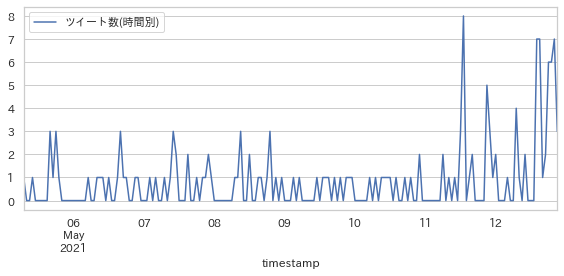

In [ ]:
df_body['length'].resample('H').count().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(時間別)")
# df_tweet['lang'].resample('H').count().rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(7日移動平均)")
plt.tight_layout()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_body['mecab'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

['10', '10年', '15度', '16度', '17度', '1年間', '1次', '200円', '2014年', '2020年度']

In [ ]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

28 	 治療
27 	 値下げ
26 	 なる
21 	 がん
17 	 ない
16 	 価格
15 	 小野薬品
15 	 保険
14 	 適用


In [ ]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
df_count.head()

,10,10年,15度,16度,17度,1年間,1次,200円,2014年,2020年度,2021年,20度,22年,23度,24度,2万円,3000万円,360m,3b,3月,3週間,40,42週間,5分,60kg,849円,8月,fda,honoka,may,mhx,nivolumab,pd,wish,yahoo,あと,いい,いう,いつも,うち,...,長い,開発,関わる,関与,関係,関節,関連,闘病,阻害,限る,限定,限度額認定証,院生,陰謀論,障害,難い,電子版,非常,面白い,面談,音楽,音符,頑張る,頭痛,頻る,類似,飛躍,食べる,食前,食品,食品衛生,食道,飲む,騒がす,高い,高位,高額,高齢者,麻痺,黄疸
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_count.shape

(153, 500)

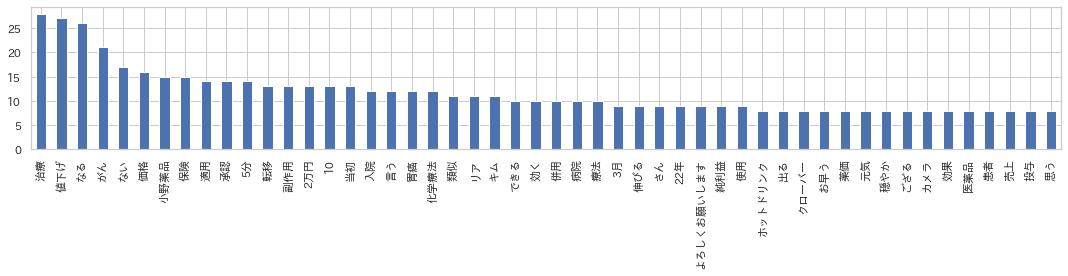

In [ ]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)

In [ ]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
df_tfidf.head()

,10,10年,15度,16度,17度,1年間,1次,200円,2014年,2020年度,2021年,20度,22年,23度,24度,2万円,3000万円,360m,3b,3月,3週間,40,42週間,5分,60kg,849円,8月,fda,honoka,may,mhx,nivolumab,pd,wish,yahoo,あと,いい,いう,いつも,うち,...,長い,開発,関わる,関与,関係,関節,関連,闘病,阻害,限る,限定,限度額認定証,院生,陰謀論,障害,難い,電子版,非常,面白い,面談,音楽,音符,頑張る,頭痛,頻る,類似,飛躍,食べる,食前,食品,食品衛生,食道,飲む,騒がす,高い,高位,高額,高齢者,麻痺,黄疸
0,0.0,0.000000,0.0,0.0,0.269419,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.29154,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.288432,0.0,0.0,0.000000,0.0,0.0,0.0,0.306274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.331421,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207852,0.0,...,0.207852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.215013,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217347,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.200856,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf.shape

(153, 500)

## 3 ツイートのテキスト分析

### 3.2 可視化

#### Word Cloud

In [ ]:
topic = bag.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

28 	 治療
27 	 値下げ
26 	 なる
21 	 がん
17 	 ない
16 	 価格
15 	 小野薬品
15 	 保険
14 	 適用


In [ ]:
topic = tfidf.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

8.66152897628165 	 値下げ
5.760444904665161 	 価格
5.193772419915831 	 5分
5.081705857690914 	 当初
5.081705857690914 	 2万円
4.706287719626192 	 なる
4.647991820723335 	 保険
4.568908138361033 	 小野薬品
4.512262358153963 	 適用


In [ ]:
font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

値下げ,価格,5分,当初,2万円,なる,保険,小野薬品,適用,がん,治療,類似,キム,リア,10,朝日新聞デジタル,伸びる,純利益,3月,22年


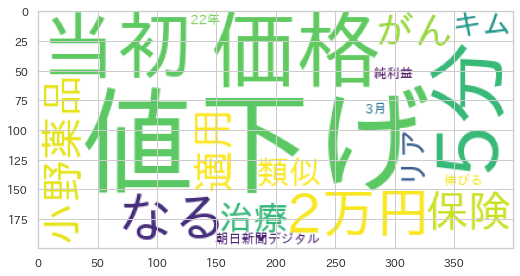

In [ ]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(8,4))
words = count_vectorizer.get_feature_names()
n_top_words = 20

long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
print(long_string)

wordcloud = WordCloud(font_path=font_path[0], background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
plt.imshow(wordcloud)

plt.tight_layout()

#### 共起ネットワーク

In [ ]:
n_top_words = 50
top_tf = tf.argsort()[:-n_top_words:-1]
top_tf

array([323, 131,  69,  47,  68, 129, 183, 130, 457, 219,  23, 447, 149,
        15,   0, 194, 137, 420, 397, 153, 485, 102,  82,  66, 150, 125,
       343, 345,  19, 122,  58,  12,  78, 367, 128,  98, 142,  83,  40,
       404, 132, 357,  56,  80, 151, 155, 201, 171, 224])

In [ ]:
df_nodes = pd.DataFrame({'label': [feature_names[i] for i in top_tf], 'freq': tf[top_tf]})
df_nodes.head()

,label,freq
0,治療,28
1,値下げ,27
2,なる,26
3,がん,21
4,ない,17


In [ ]:
from itertools import combinations
pairs = list(combinations(top_tf, 2))

min_col = 1
left, right, freq = [], [], []
for p in pairs:
    df = df_count[(df_count.iloc[:, list(p)] > 0).all(axis=1)].shape[0]
    if df > min_col:
        left.append(feature_names[p[0]])    
        right.append(feature_names[p[1]])
        freq.append(df)

df_edges = pd.DataFrame({'left': left, 'right': right, 'freq': freq})
df_edges.head()

,left,right,freq
0,治療,なる,6
1,治療,がん,3
2,治療,ない,2
3,治療,承認,4
4,治療,転移,2


Louvain Modularity:  0.6276675215086255


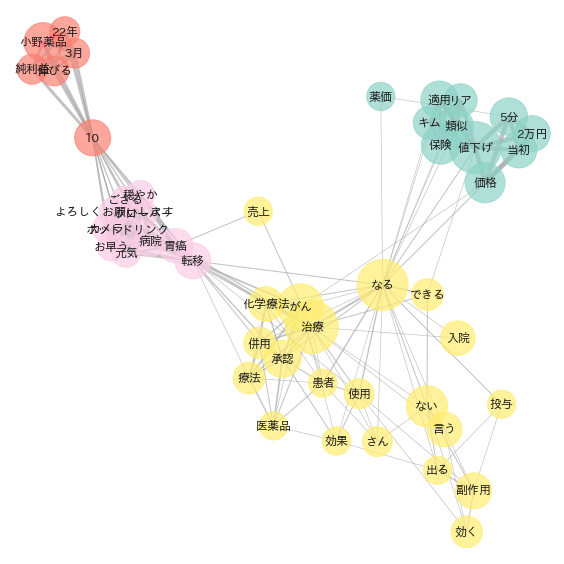

In [ ]:
import networkx as nx
import community

G = nx.Graph()
G.add_nodes_from(df_nodes['label'])
G.add_weighted_edges_from(df_edges.values)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
part = community.best_partition(G)
print("Louvain Modularity: ", community.modularity(part, G))
size = float(len(set(part.values())))

# 孤立した node を削除
isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
for n in isolated:
    G.remove_node(n)

node_size = df_nodes['freq'] * 100
node_class = [part.get(node) for node in G.nodes()]
edge_width = [d["weight"] / 3 for (u, v, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, alpha=0.7, cmap=plt.get_cmap("Set3_r"), node_size=node_size, node_color=node_class)
nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="darkgrey", width=edge_width)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_weight="bold")

plt.axis('off')
plt.tight_layout()

In [ ]:
(node_size.shape)

(49,)

#### トピックモデル

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA

# n_topics = [4,5,6,7,8,9]
n_topics = [2,3,4,5,6,7,8,9]
search_params = {'n_components': n_topics}

lda = LDA(max_iter=25, learning_method='batch', random_state=0, n_jobs=-1, n_components=4)
model = GridSearchCV(lda, param_grid=search_params)
model.fit(tfidf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=25,
                                                 mean_change_tol=0.001,
                                                 n_components=4, n_jobs=-1,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                                  

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(bag.toarray()))

best_lda_model

Best Model's Params:  {'n_components': 2}
Best Log Likelihood Score:  -795.5095846221291
Model Perplexity:  574.2474201053432


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=25,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

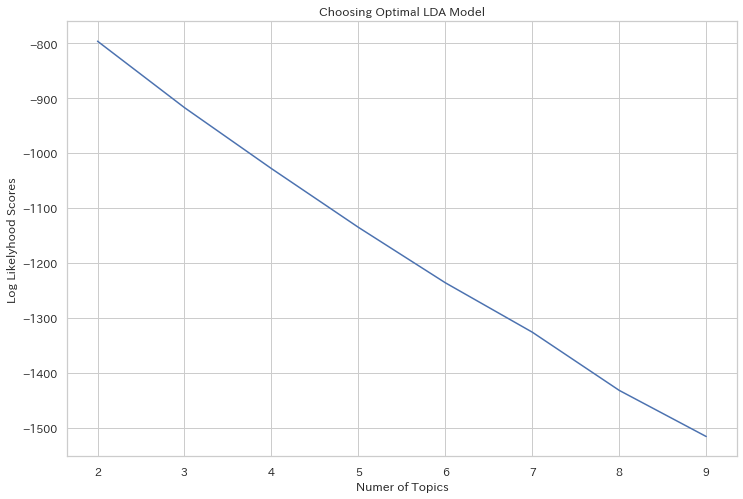

In [ ]:
log_likelyhoods_score = [round(score) for score in model.cv_results_["mean_test_score"]]

plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_score)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Numer of Topics")
plt.ylabel("Log Likelyhood Scores")
plt.show()


Topic # 0 :
保険,適用,キム,リア,類似,値下げ,ない,なる,共同通信,使える,言う,病院,副作用,よろしくお願いします,胃癌,やる,四つ葉のクローバー,今日,出る,ホットドリンク,カメラ,クローバー,平常心,お早う,ござる,元気,穏やか,一般,それ,思う,治療,転移,入院,パソコン,ハーブ,過ごす,くもる,nivolumab,終わる,リンパ節,肝臓,点滴,高額,診察,晴れ,できる,本当に,状態,そう,投与,もう,日本,続く,のち,早起き,早い,頑張る,無い,いう,笑顔,結果,検査結果,長い,変わる,ダメ,抗体,あと,混む,ガン,治る,15度,感じ,悪い,楽ちん,怖い,子供,高齢者,作る,ハヤシライス,読む,ステロイド,効果,注射,10,聞く,下がる,伝える,痛い,凄い,免疫,騒がす,然ること,1年間,3000万円,昨今,プレイヤー,薬剤,費用,考える,食べる,採血,場合,近年,新しい,抗癌剤,数値,高い,医療,楽しい,クール,電子版,24度,良い,治す,may,honoka,16度,血糖,速報,17度,山中伸弥,時々,決まる,どう,いい,20度,40,23度,企業,やっぱり,血液検査,限定,賄える,今後,昨日,通院,聴く,音楽,免疫力,ノーベル賞,知る,ずっと,説明,腫瘍,一番,病名,飲む,黄疸,使用,ぶり,頭痛,嗅覚,味覚,吐き気,最適,いつも,通り,受け手,三男,初回,製薬,主治医,お母さん,泣く,曲げる,出来る,アカン,嬉し涙,お昼,これ,誰彼,提供,構う,コロナ,また,細胞,最中,素材,ミリグラム,中国,比べる,経済,すごい,負担,買える,綺麗事,検査,打つ,検討中,箇所,採尿,抗がん剤治療,次第,阻害,抜粋,説明会,質問,大きい,しれる,肯定,美味しい,意味,悲しい,日本の医療,年間,可能性,感心の表情,最高,日数,頻る,現状,負ける,効く,原発,研究,奏効,出す,pd,心筋炎,音符,余命宣告,末期,投薬,成功,可能,未だ,限る,残る,残ってる,麻痺,酷い,大丈夫,食前,闘病,戦う,本庶佑,使う,無理,退院,新薬,放射線治療,月曜日,指導,昼前,悩み,悩む,数年前,筋違い,支え,こんにちは,陰謀論,これから,術後,みる,肺癌,我慢,衝撃,旦那,禁句,ちゃんと,微妙,肺炎,更に,明日,問題,開発,まう,かる,経過,調整,たま,残念,悪意,攻撃

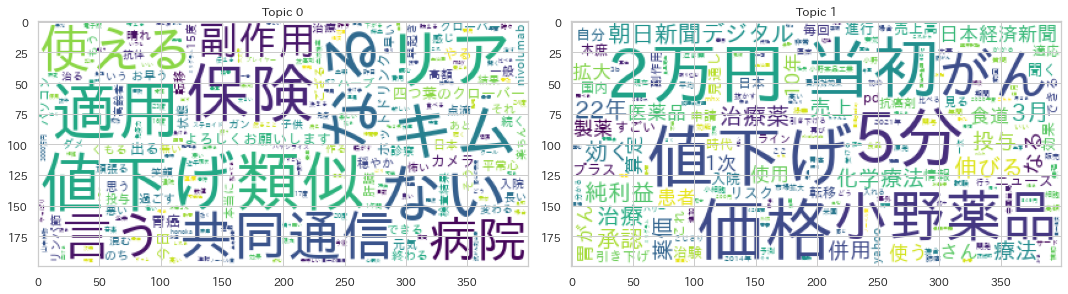

In [ ]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(15,8))
words = count_vectorizer.get_feature_names()
n_top_words = 500

for topic_idx, topic in enumerate(best_lda_model.components_):
    print("\nTopic #", topic_idx, ":")
    long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(long_string)

    ax = fig.add_subplot(2, 2, topic_idx + 1)
    wordcloud = WordCloud(font_path=font_path[0], background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    ax.imshow(wordcloud)
    ax.set_title('Topic '+str(topic_idx))

fig.tight_layout()
fig.show()